#Fake news detection is the process of identifying and classifying news articles or information that is intentionally misleading or false. Fake news can spread quickly through social media and other online platforms, and can have negative impacts on individuals and society as a whole.

There are various techniques used to detect fake news, including:

Fact-checking: Fact-checking involves verifying the accuracy of claims made in news articles. This can be done by checking primary sources, consulting experts, and using other reliable sources of information.

Machine learning: Machine learning algorithms can be trained to analyze various features of news articles, such as the language used, the source of the article, and the content itself, to determine whether an article is likely to be fake or not.

Network analysis: Network analysis involves examining the patterns of how news articles are shared and disseminated online. This can help identify sources of fake news and the individuals or groups who are most likely to spread it.

It's important to note that no single technique can completely eliminate the spread of fake news. The best approach is to use a combination of techniques and to stay informed about the news from a variety of reliable sources.

#Created by Rahul Balaji

**Fake news is becoming increasingly prevalent, and it can have serious implications. NLP can be used to detect and classify fake news in order to protect society from its damaging effects. Additionally, NLP can be used to identify topics and trends in news articles, which can be beneficial for research and news outlets.**

# 3. Loading data

In [ ]:
#Loading the data for true as well as fake news
import numpy as np 
import pandas as pd
fake = pd.read_excel('Fake.xlsx')
fake['flag'] = 0
fake

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
true = pd.read_excel('True.xlsx')
true['flag'] = 0
true

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df = pd.DataFrame()
df = true.append(fake)

# 4. EDA + Data cleaning

**Let's check the datatypes.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


**Removing the duplicates and preventing problems with indexing.**

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

**We can see that the date format is not the one we need. I will apply the appropriate date format for future purposes.**

In [ ]:
# Correcting some data
df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')


df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

In [ ]:
df['date'] = df['date'].str.replace(' ', '')

In [ ]:
for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

## Non-text feature plotting (date, subject)

**Here we will try to elicit insights from non-text features to get to know if they will help us boost the Text Classifier.**

In [ ]:
sub = df[['month', 'flag']]
sub = sub.dropna()
sub = sub.groupby(['month'])['flag'].sum()

In [ ]:
sub = sub.drop('NaT')

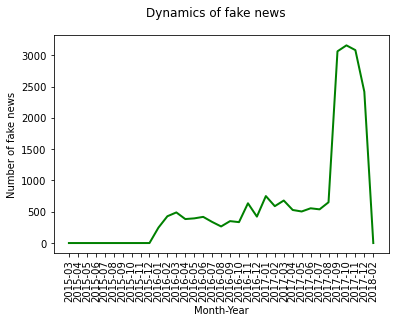

In [ ]:
import matplotlib.pyplot as plt

plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

**What a spike in the dynamics of fake news in late 2017!**

In [ ]:
sub2 = df[['subject', 'flag']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['flag'].sum()

<BarContainer object of 8 artists>

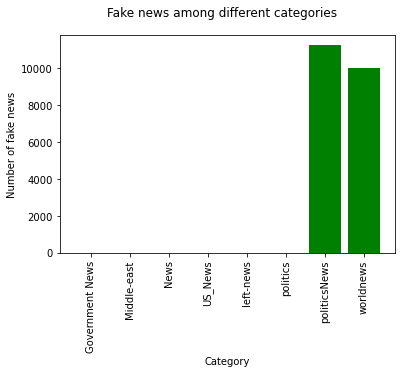

In [ ]:
plt.suptitle('Fake news among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')
#ax1.plot(x, y)
#ax2.plot(x, -y)

**As we have discovered, such features as**
* subject
* date

**might be also crucial for the algorithm to decide whether the piece of news is fake or real. We will try to include them in the model.**

**The goal of this notebook is to explore the use of NLP for detecting and classifying fake news. We will analyze different techniques and approaches and evaluate their effectiveness.**

# 5. Text preparation

In [ ]:
nlp = df

**I will add the 'subject' feature to the title field as it might have an influence on the outcome of classification.**

In [ ]:
#nlp['title'] = nlp['title'] + ' ' + nlp['subject']

## 5.1 Word Cloud visualization

**Here I am going to take one example and try visualize tfidf as a wordcloud.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['flag'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

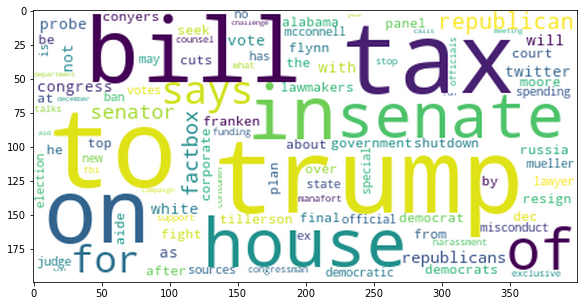

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='blackman')

**Indeed, looks definitely like fake news :)**

**And we can also see out 'subject' feature in the foreground as it has been added manually in every title. Therefore, out vectorizer considers it as an important & frequent word.**

## 5.2 Tfidf-vectorizing

**First, I will tokenize words to pass it on to the SnowballStemmer method, which will take out lemmas from words.**

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**An important step in every NLP-task is to get the roots of words in order not to distract the model by 'different' words.**

In [ ]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

**Take the standard english bag of stopwords from nltk.**

In [ ]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**And finally TfidfVectorizing. You can also take CountVectorizer, but I prefer Tfidf as it has masses of advantages.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['flag'], test_size=0.33, random_state=1)

# 6.Problem Statment

**The goal of this notebook is to explore the use of NLP for detecting and classifying fake news. We will analyze different techniques and approaches and evaluate their effectiveness.**

# 7. Model building

**I will use several approaches to solve the classification task, such as:**

1) Traditional (which are known as efficient for text classification):

    1.1) SVM
    1.2) Naive Bayes
    1.3) XGBoost
    
2) Not-very-traditional (Experimental): PyCaret NLP toolkit (I will apply unsupervised model to generate features which I will in turn pass on to the supervised model)

## 7.1 Linear SVC

In [ ]:
scores = {}

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print(cross_val_score(clf, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_SVM, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVM, y_test)


[0.91105592 0.93031686 0.92696026]
0.958706265256306


**This looks suspiciously good, but lets try another algorithm.**

## 7.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

y_pred_MNB = clf2.predict(X_test)
print(cross_val_score(clf2, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_MNB, y_test))

scores['MultinomialNB'] = accuracy_score(y_pred_MNB, y_test)

[0.88957508 0.89406552 0.92883996]
0.939924057499322


**Okay, this model performs a little worse, but still very good.**

## 7.3 XGBoost

In [ ]:
from xgboost import XGBClassifier

clf3 = XGBClassifier(eval_metric='rmse', use_label_encoder=False)
clf3.fit(X_train, y_train)

y_pred_XGB = clf3.predict(X_test)
print(cross_val_score(clf3, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_XGB, y_test))

scores['XGB'] = accuracy_score(y_pred_XGB, y_test)

[0.88615157 0.92353652 0.90695489]
0.9374830485489558


# 6. Conclusion

**NLP can be used to detect and classify fake news, and can be a powerful tool in fighting its damaging effects. By exploring different techniques and approaches, we can gain an understanding of how NLP can be used to combat fake news. We have trained & tested 3 models for NLP task (implementing the traditional NLP preprocessing strategies). They all perform very good, however this is most likely due to the high correlation of the target other categorical features (such as 'subject'). If we did not add it to analysis, the result could have been totally different.**

